# BeautifulSoup4

BeautifulSoup은 기억하기 쉬운 단순한 API가 특징인 스크래핑 라이브러리 이다. 목적에 따라 파서를 선택적으로 사용 가능하다.

In [ ]:
from bs4 import BeautifulSoup
import requests

BeautifulSoup을 배우기 전에,

### HTML Response

클라이언트(사용자)가 웹서버(ex. naver, google ...)에 요청을 했을때, 서버에서는 일반적으로 HTML, CSS, JavaScript, Image 형식으로 응답을 하게 됩니다.
HTML 문서는 중첩된 태그로 구성된 계층형 구조 입니다.

```html
<!doctype html>
<html>
    <head>
        <meta charset='utf-8'>
        <title>환영합니다</title>
    </head>
    <body>
        <h1>안녕하세요</h1>
        <ul id='homepage_law'>홈페이지 규칙
            <li class='law'>욕설 금지</li>
            <li class='law'>비속어 사용 금지</li>
        </ul>    
    </body>
</html>
```

#### DOM

브라우저는 위에 보이는 HTML문자열을 DOM Tree로 변환하여 문서를 표현하게 됩니다.



#### 복잡한 HTML문자열에서 내가 원하는 문자열 가져오는 방법

1. 정규표현식 활용

    - 가장 빠른 처리가 가능하나, 정규표현식의 룰을 만드는 것이 번거롭고 복잡하여 다양한 처리를 하기 어려운 점이 있습니다.
    - 때에 따라 필요할 수 있습니다.

2. HTML Parser 라이브러리를 활용(V)

    - DOM Tree를 탐색하는 방식으로 적용이 쉬운 장점이 있습니다.
    - Ex) BeautifulSoup4, lxml .......



# 웹 개발자 도구
 - 크롬 / 사파리 / 파이어폭스 / 엣지 브라우져 개발자 도구
 - 파이썬 Web libraries

## 크롬 개발자 도구 (Chrome Developer Tools)
크롬에 기본 탑재된 웹 개발 및 디버깅 도구
* 우측 상단의 메뉴 > 도구 더 보기 > 개발자 도구 (F12 혹은 Ctrl+Shift+I, MacOS Cmd+Opt+I)
* 요소(Elements), 네트워크(Network), 소스(Sources), 타임라인(Timeline), 콘솔(Console) 등 기능
* 요소(Element) 탭: 웹 페이지 요소의 CSS와 HTML 검사

### 보안도구에 의한 차단

개발자도구를 열었을 때 닫히면 Ahnlab safe 같은 인터넷 뱅킹 보안도구를 의심해 보자. 

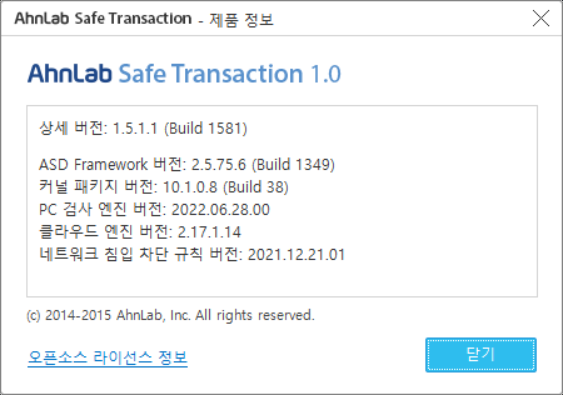

인터넷 뱅킹/HTS 등의 사용을 하지 않을 때는 문제가 없지만 사용중에 개발자 도구를 열면 강제로 종료한다.

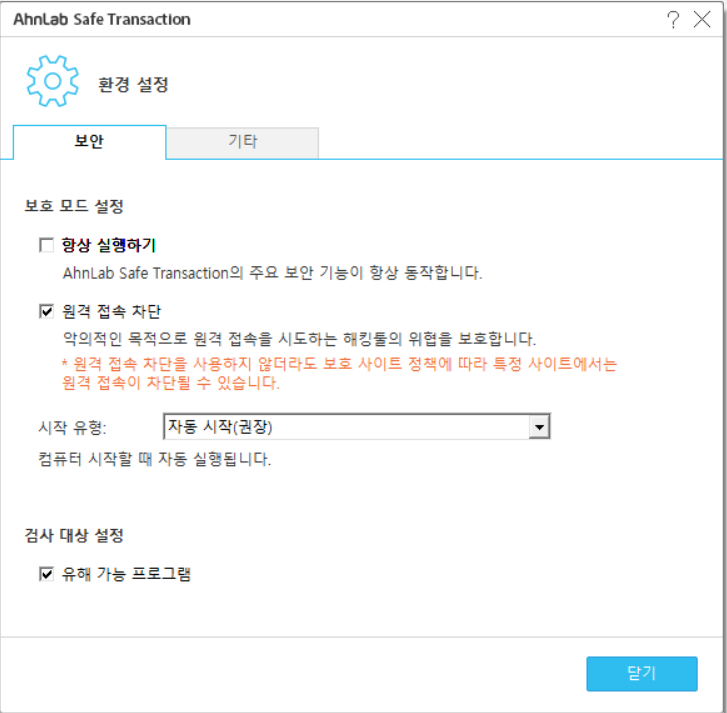

# 크롤링 주요 이슈

1. 단순 HTTP 요청: requests.get()
1. 요청에 데이터 실어 보내기: requests.post()
1. 응답 페이지 분석, 데이터 추출, 데이터 전처리
1. 헤더 지정: requests 에 헤더값 지정
1. 문자 인코딩 (UTF-8, EUC-KR)
1. 정규식
1. 로그인(인증): requests의 Session 객체 사용
1. IP-Ban: 프록시 서버, 프록시 경유하기
1. 동적으로 화면 혹은 데이터가 생성: Selenium 사용
1. SSL 에러

# BeautifulSoup 설치

HTML과 XML 파싱 지원 라이브러리로 Python2를 위한 BeautifuSoup과 Python3를 지원하는 BeautifulSoup4가 있다.
여기서는 Python3와 BeautifulSoup4를 사용한다.

여기에 chardet 패키지를 설치하면 beautifulsoup의 인코딩 방식 자동 판별 정확도가 향상되므로 같이 설치한다.

```sh
$ pip install --user bs4 chardet requests cssselect
```


> Beautiful Soup 3
> - Beautiful Soup 3 was the official release line of Beautiful Soup from May 2006 to March 2012. 
> - Beautiful Soup 3 works only under Python 2.x. It is licensed under the same license as Python itself.



### Installing parser

[파서를 설치](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser)할 수 있다.



```terminal
$ pip install html5lib
```



| Parser | Typical usage | Advantages | Disadvantages |
| -------- | ------------------------------- | ---------------------- | ------------------------ |
| Python’s html.parser	| ```BeautifulSoup(markup, "html.parser")``` | - Batteries included<br> - Decent speed - Lenient (as of Python 2.7.3 and 3.2.) | Not very lenient (before Python 2.7.3 or 3.2.2) |
lxml’s HTML parser | ```BeautifulSoup(markup, "lxml")```	 |  - Very fast - Lenient |  External C dependency |
lxml’s XML parser|```BeautifulSoup(markup, "lxml-xml")```<br>```BeautifulSoup(markup, "xml")```|- Very fast - The only currently supported XML parser | External C dependency |
| html5lib | ```BeautifulSoup(markup, "html5lib")```| - Extremely lenient - Parses pages the same way a web browser does   - Creates valid HTML5| - Very slow - External Python dependency |


### lxml parser

`html.parser` 는 태그가 닫히지 않는 경우 분석이 어렵다고 한다. lxml parser는 C로 작성되어 빠르고 이런 태그도 처리가 가능하다.

`lxml` 파서를 설치한다.

```terminal
$ pip install --user lxml
```

Raspberry Pi, Odroid, Rock64 등의 시스템은 컴파일 에러가 발생할 수 있다. apt 로 설치도 가능하다.

```terminal
$ sudo apt install python3-lxml
```

In [ ]:
! python -V

In [ ]:
! pip install beautifulsoup4 html5lib lxml chardet

# 기본 사용

외부 html 파일을 읽어 내용을 탐색할 수 있다.

```python
from bs4 import BeautifulSoup

with open("index.html") as fp:
    soup = BeautifulSoup(fp)

```

## Tag 이름으로 탐색하기



In [ ]:
html = """
<html>
<head>
    <title>The Dormouse's story</title>
    
    <style>
        html {
            box-sizing: border-box;
            overflow: -moz-scrollbars-vertical;
            overflow-y: scroll;
        }

        *,
        *:before,
        *:after {
            box-sizing: inherit;
        }

        body {
            margin: 0;
            background: #fafafa;
        }
    </style>
</head>
<body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
  <h1 class='subject'>크롤링을 위한 조건</h1>
  <p id='ca-list'>
      <ol>
        <li class='bullet'>url 기반 requests 처리
        <li class='bullet'>redirect 처리
      </ol>
      <a href='..'>
  </p>
  <p>
     <input name="email"/>
     <div data-foo="value">foo!</div>
  </p>
</body></html>
"""

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
soup.li

In [ ]:
soup.p

In [ ]:
type(soup)

In [ ]:
print(soup.head) # <head><title>The Dormouse's story</title></head>

In [ ]:
print(soup.title) # <title>The Dormouse's story</title>

In [ ]:
soup.p

In [ ]:
soup.h1

In [ ]:
soup.tagStack

### .string

태그에 차일드가 1개 있으면 `.string` 속성에 내용을 담고 있다.


```python
title_tag.string
# u'The Dormouse's story'
```

In [ ]:
soup.title

In [ ]:
soup.title.string

태그 안에 차일드 태그가 있고 내부 태그가 `.string` 속성이 있으면  부모 태그는 자식 태그의 .string 를 갖는 것으로 간주한다.

```html
<div><span>텍스트...텍스트...내용</span></div>
```

```python
head_tag.contents
# [<title>The Dormouse's story</title>]
```

```python

head_tag.string
# u'The Dormouse's story'
```

In [ ]:
soup.head

In [ ]:
soup.head.contents

In [ ]:
soup.head.string

In [ ]:
soup.h1

In [ ]:
soup.h1.contents

In [ ]:
soup.h1.string

In [ ]:
soup.p

In [ ]:
soup.p.string

태그 내부에 여러 차일드 태그가 존재하면 `.string` 이 어떤 태그를 참조하는지 불명확 하다. 그런경우는 `None` 이 반환된다.

```python
print(soup.html.string)
# None
```

In [ ]:
soup.html.string #None

## find() 메서드로 찾기

[find()](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find) 는 태그 이름, 속성 이름을 통해서 값을 찾는다.

```python
find(name, attrs, recursive, string, **kwargs)
find_all(name, attrs, recursive, string, **kwargs)
 - name: 태그 이름
 - attrs: 태그의 id, class 속성 사용
```



[find_all()](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all) 는 결과를 리스트로 반환하고 find()는 결과 값을 반환한다.



#### 태그 이름

name은 태그 이름을 제시한다.

```python
soup.find_all("title")
# [<title>The Dormouse's story</title>]
```

In [ ]:
soup.find("h1")

In [ ]:
soup.find("h1").string

In [ ]:
soup.find_all('h1')

In [ ]:
li = soup.find('li')
li

In [ ]:
type(li)

In [ ]:
soup.find_all('ol')

In [ ]:
soup.find("ol")

In [ ]:
soup.find("ol").find('li')

In [ ]:
soup.find("ol").find("li")

#### 태그 애트리뷰트 찾기

태그 애트리뷰트를 이용해 검색할 수 있다. [attrs argument](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#the-keyword-arguments) 

```python
soup.find_all(id='link2')
soup.find_all(id=True)   #All of id

soup.find_all(href=re.compile("elsie"))
# [<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]
```

*`data-`* 애트리뷰트

```python
data_soup = BeautifulSoup('<div data-foo="value">foo!</div>')
data_soup.find_all(data-foo="value")
```

여러 속성을 찾을 경우 `find_all(arrts=)` 사용


```python
data_soup.find_all(attrs={"data-foo": "value"})
```


In [ ]:
html

In [ ]:
soup.find("h1")

In [ ]:
# 검색할 요소의 속성
soup.find("h1", attrs={"class":"subject" }).string

In [ ]:
cond = { "class":"bullet"}
soup.find('li', cond)

In [ ]:
soup.find(id='ca-list')

In [ ]:
soup.find_all(id='ca-list')

In [ ]:
result = soup.find(id='ca-list')
result

In [ ]:
result = result.find_all(attrs={'class':'bullet'})
result

In [ ]:
for item in result:
    print(type(item))

In [ ]:
for item in result:
    print(item.string)

In [ ]:
html

attrs 로 name 속성 검색은 안된다. BeautifulSoup.find() 매개변수 이름으로 name을 사용하기 때문이다.

In [ ]:
# name_soup = BeautifulSoup('<input name="email"/>')
soup.find_all(name="email") # []

name 속성을 지정하고 싶으면 attrs 를 사용해서 명시해 준다.

In [ ]:
soup.find_all(attrs={"name": "email"})# [<input name="email"/>]

#### `class_` 인자 사용하기

CSS class 는 `class_` 인자를 사용해서 찾을 수 있다.

In [ ]:
for i in soup.find_all(class_='bullet'):
    print(i.string)

In [ ]:
for i in soup.find_all(attrs={'class':'bullet'}):
    print(i.string)

In [ ]:
for i in soup.find_all('li', attrs={'class':'bullet'}):
    print(i.string)

In [ ]:
res = requests.get('http://httpbin.org/')
sitesoup = BeautifulSoup(res.text, 'html.parser')

In [ ]:
sitesoup.find_all('div', class_='swagger-ui')

## CSS selectors

BeautifulSoup 에서 lxml 파서를 사용하면  css selector 방식의 검색을 할 수 있다.

[CSS Selector](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#css-selectors) 를 이용한 쿼리를 `select()` 메서드로 할 수 있다.

```python
soup.select("title")
# [<title>The Dormouse's story</title>]
```

select_one은 결과중 최종 하나만 선택해 반환하고

 ```python
soup.select_one("div#meigen > h1").string
```

select()는 모든 결과를 가지고 있다.

```python
li_list = soup.select("div#meigen > ul.items > li")
for li in li_list:
  print("li =", li.string)
```

In [ ]:
html = """
<div id=prices class="gf-tablewrapper sfe-break-bottom-16">
    <table class="gf-table historical_price">
        <tr class=bb>
            <th class="bb lm lft">Date
            <th class="rgt bb">Open
            <th class="rgt bb">High
            <th class="rgt bb">Low
            <th class="rgt bb">Close
            <th class="rgt bb">Volume
        <tr>
            <td class="lm">Feb 28, 2014
            <td class="rgt">100.71
            <td class="rgt">100.71
            <td class="rgt">100.71
            <td class="rgt rm">0
    </table>
</div>
"""

css selector 는 `html.parser` 에서는 검출이 잘 안된다.

In [ ]:
# html.parser 로는 태그 검출이 안된다.
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
soup.td.string

In [ ]:
# tags = soup.select('#prices > table > tr .rgt')
tags = soup.select('tr .rgt')
tags

`lxml` 파서를 사용한다.

In [ ]:
soup = BeautifulSoup(html, 'lxml')

In [ ]:
# tags = soup.select('#prices > table > tr .rgt')
# tags = soup.select('tr .rgt')
tags = soup.select('.rgt')
tags

In [ ]:
soup.select("tr > th")

In [ ]:
soup.select("tr td")

해당 태그의 클래스/아이디를 직접 표기

```html
TAG.class_name

TAG#id_name
```

In [ ]:
soup.select("tr td.rgt")  # 'td .rgt'

### nth childs

`TAG:nth-child` 셀렉터 

```python
soup.select("p:nth-of-type(3)")
# [<p class="story">...</p>]
```


In [ ]:
html ='''
  <ol>
    <li>Espresso</li>
    <li>Americano</li>
    <li>Caffe Latte</li>
    <li>Caffe Mocha</li>
    <li>Caramel Latte</li>
    <li>Cappuccino</li>
  </ol>
  <ul>
    <li>Espresso</li>
    <li>Americano</li>
    <li>Caffe Latte</li>
    <li>Caffe Mocha</li>
    <li>Caramel Latte</li>
    <li>Cappuccino</li>
  </ul>
'''

In [ ]:
soup = BeautifulSoup(html, 'lxml')

In [ ]:
soup.select_one("ol > li:nth-child(2)")

In [ ]:
soup.select("ol > li:nth-child(2n)")

In [ ]:
soup.select_one("ol > li:first-child")

In [ ]:
soup.select_one("ul > li:last-child")

In [ ]:
soup.select_one("ol > :nth-last-child(1)")

In [ ]:
soup.select_one("ol > :nth-last-child(3)")

In [ ]:
soup.select("ol > :nth-last-child(2n+1)")

### .select_one()

Selector를 query로 찾을 수 있다.

select_one은 결과중 최종 하나만 선택해 반환하고

 ```python
soup.select_one("div#meigen > h1").string
```

select()는 모든 결과를 가지고 있다.

```python
li_list = soup.select("div#meigen > ul.items > li")
for li in li_list:
  print("li =", li.string)
```



# 실습

## "실습" 네이버 영화 랭킹

크롬 개발자 도구로 영화 제목을 찾는다.

개발자도구를 켜고 https://movie.naver.com/ 에서 영화랭킹을 선택해서 확인해 보자

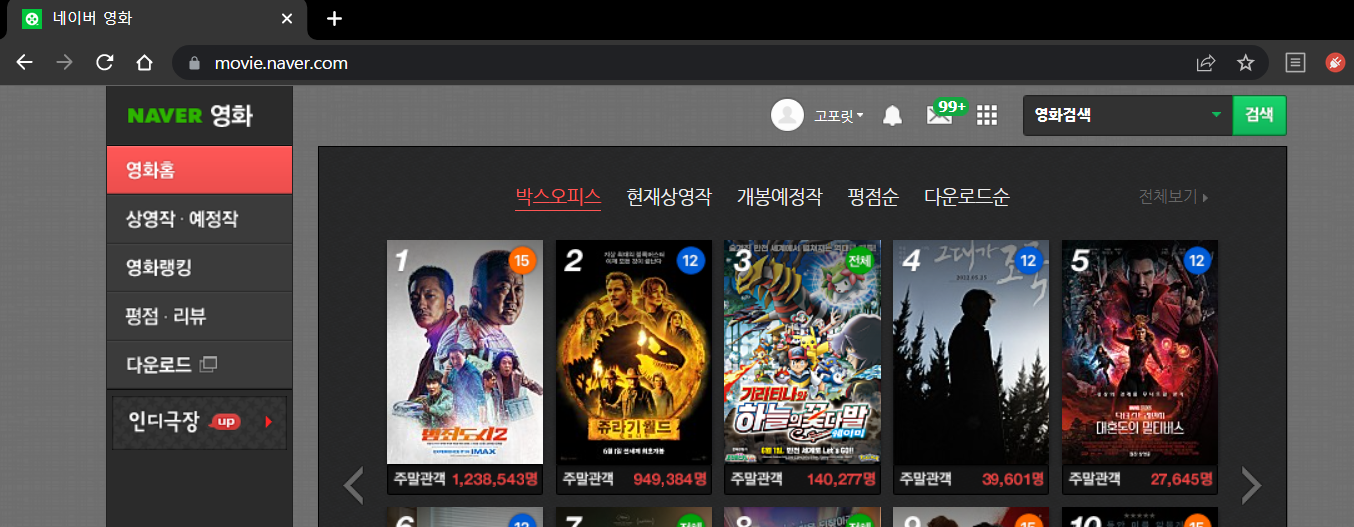


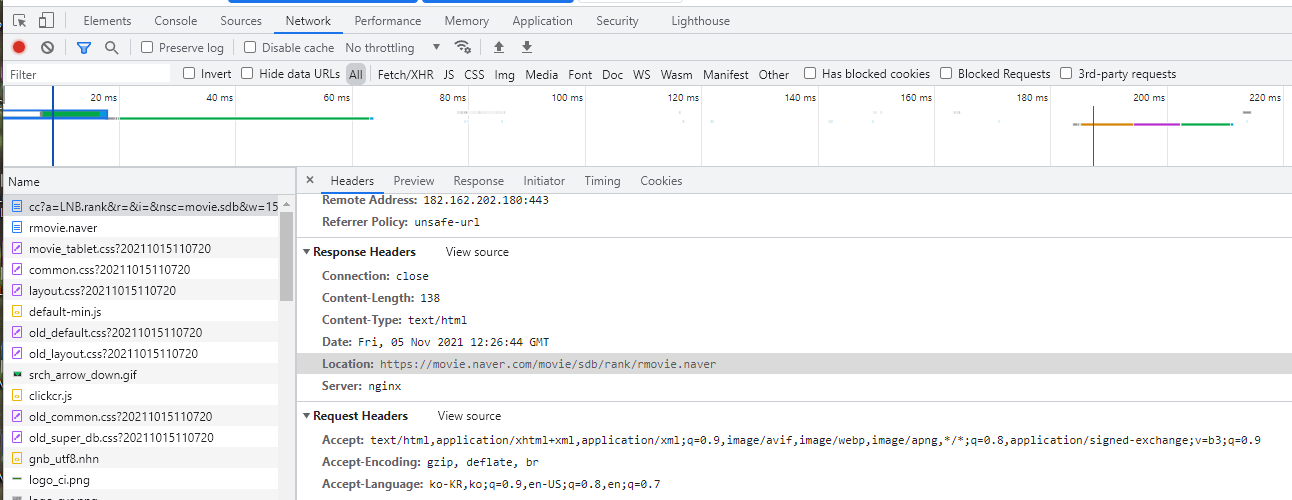


https://movie.naver.com/movie/sdb/rank/rmovie.nhn 에서 순위 영화를 찾아보자,

In [104]:
response = requests.get('https://movie.naver.com/movie/sdb/rank/rmovie.naver')
response.status_code

200

In [ ]:
response.text[300:500]

In [105]:
# soup = BeautifulSoup(response.text, 'html.parser')
soup = BeautifulSoup(response.text, 'lxml')

In [109]:
t = soup.find_all('table')

In [110]:
len(t)

1

In [112]:
t = soup.find_all('td', class_='title')

In [113]:
for item in t:
    print(item.find('div').string)

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [114]:
t[0]

<td class="title">
<div class="tit3">
<a href="/movie/bi/mi/basic.naver?code=184516" title="블랙 팬서: 와칸다 포에버">블랙 팬서: 와칸다 포에버</a>
</div>
</td>

In [116]:
for item in t:  # soup.find_all('td', class_='title')
    print(item.find('a').string,
         item.find('a').get('href')
         )

블랙 팬서: 와칸다 포에버 /movie/bi/mi/basic.naver?code=184516
데시벨 /movie/bi/mi/basic.naver?code=205027
동감 /movie/bi/mi/basic.naver?code=215970
자백 /movie/bi/mi/basic.naver?code=191430
올빼미 /movie/bi/mi/basic.naver?code=222301
폴: 600미터 /movie/bi/mi/basic.naver?code=220613
에브리씽 에브리웨어 올 앳 원스 /movie/bi/mi/basic.naver?code=219402
블랙 아담 /movie/bi/mi/basic.naver?code=190694
한산 리덕스 /movie/bi/mi/basic.naver?code=223816
인생은 아름다워 /movie/bi/mi/basic.naver?code=187821
리멤버 /movie/bi/mi/basic.naver?code=191657
옆집사람 /movie/bi/mi/basic.naver?code=218468
고속도로 가족 /movie/bi/mi/basic.naver?code=218049
압꾸정 /movie/bi/mi/basic.naver?code=195973
극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교 /movie/bi/mi/basic.naver?code=219812
유포자들 /movie/bi/mi/basic.naver?code=222541
심야카페: 미씽 허니 /movie/bi/mi/basic.naver?code=221022
파이어버드 /movie/bi/mi/basic.naver?code=204443
영웅 /movie/bi/mi/basic.naver?code=184509
탄생 /movie/bi/mi/basic.naver?code=209280
스트레인지 월드 /movie/bi/mi/basic.naver?code=217078
주연 /movie/bi/mi/basic.naver?code=213419
양자경의 더 모든 날 모든 순

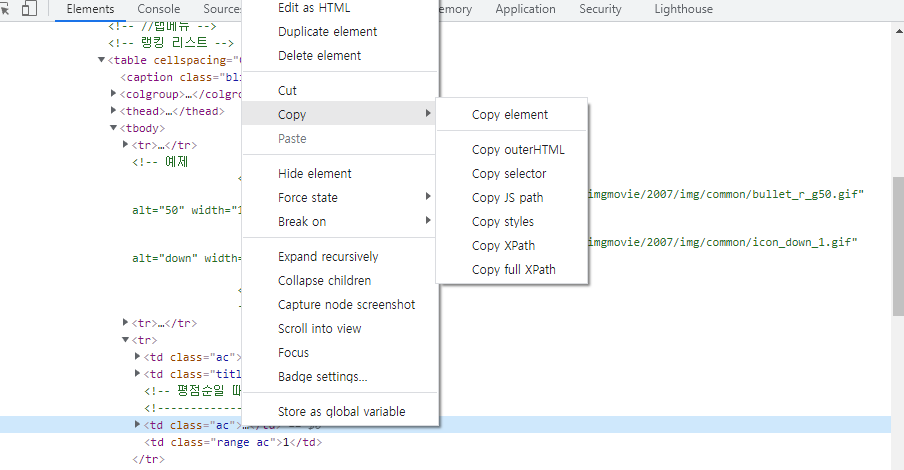

In [120]:
# t = soup.select('#old_content > table > tbody > tr:nth-child(2) > td.title > div')
t = soup.select('#old_content > table > tbody > tr:nth-child(3) > td.title > div > a')
t

[<a href="/movie/bi/mi/basic.naver?code=205027" title="데시벨">데시벨</a>]

In [121]:
t[0].text, t[0].get('href')

('데시벨', '/movie/bi/mi/basic.naver?code=205027')

In [122]:
t = soup.select('#old_content > table > tbody > tr')

In [123]:
len(t)

56

In [128]:
for k,item in enumerate(t):
    a = soup.select(f'#old_content > table > tbody > tr:nth-child({k}) > td.title > div > a')
    # print(a.text, a.get('href'))
    print(k, a)

0 []
1 []
2 [<a href="/movie/bi/mi/basic.naver?code=184516" title="블랙 팬서: 와칸다 포에버">블랙 팬서: 와칸다 포에버</a>]
3 [<a href="/movie/bi/mi/basic.naver?code=205027" title="데시벨">데시벨</a>]
4 [<a href="/movie/bi/mi/basic.naver?code=215970" title="동감">동감</a>]
5 [<a href="/movie/bi/mi/basic.naver?code=191430" title="자백">자백</a>]
6 [<a href="/movie/bi/mi/basic.naver?code=222301" title="올빼미">올빼미</a>]
7 [<a href="/movie/bi/mi/basic.naver?code=220613" title="폴: 600미터">폴: 600미터</a>]
8 [<a href="/movie/bi/mi/basic.naver?code=219402" title="에브리씽 에브리웨어 올 앳 원스">에브리씽 에브리웨어 올 앳 원스</a>]
9 [<a href="/movie/bi/mi/basic.naver?code=190694" title="블랙 아담">블랙 아담</a>]
10 [<a href="/movie/bi/mi/basic.naver?code=223816" title="한산 리덕스">한산 리덕스</a>]
11 [<a href="/movie/bi/mi/basic.naver?code=187821" title="인생은 아름다워">인생은 아름다워</a>]
12 []
13 [<a href="/movie/bi/mi/basic.naver?code=191657" title="리멤버">리멤버</a>]
14 [<a href="/movie/bi/mi/basic.naver?code=218468" title="옆집사람">옆집사람</a>]
15 [<a href="/movie/bi/mi/basic.naver?code=218049"

In [129]:
t = soup.find_all('div', attrs={'class':'tit3'})
len(t)

50

In [131]:
for item in t:
    print(item)

<div class="tit3">
<a href="/movie/bi/mi/basic.naver?code=184516" title="블랙 팬서: 와칸다 포에버">블랙 팬서: 와칸다 포에버</a>
</div>
<div class="tit3">
<a href="/movie/bi/mi/basic.naver?code=205027" title="데시벨">데시벨</a>
</div>
<div class="tit3">
<a href="/movie/bi/mi/basic.naver?code=215970" title="동감">동감</a>
</div>
<div class="tit3">
<a href="/movie/bi/mi/basic.naver?code=191430" title="자백">자백</a>
</div>
<div class="tit3">
<a href="/movie/bi/mi/basic.naver?code=222301" title="올빼미">올빼미</a>
</div>
<div class="tit3">
<a href="/movie/bi/mi/basic.naver?code=220613" title="폴: 600미터">폴: 600미터</a>
</div>
<div class="tit3">
<a href="/movie/bi/mi/basic.naver?code=219402" title="에브리씽 에브리웨어 올 앳 원스">에브리씽 에브리웨어 올 앳 원스</a>
</div>
<div class="tit3">
<a href="/movie/bi/mi/basic.naver?code=190694" title="블랙 아담">블랙 아담</a>
</div>
<div class="tit3">
<a href="/movie/bi/mi/basic.naver?code=223816" title="한산 리덕스">한산 리덕스</a>
</div>
<div class="tit3">
<a href="/movie/bi/mi/basic.naver?code=187821" title="인생은 아름다워">인생은 아름다워</a>
<

In [132]:
soup.select('div[class=tit3]')

[<div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=184516" title="블랙 팬서: 와칸다 포에버">블랙 팬서: 와칸다 포에버</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=205027" title="데시벨">데시벨</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=215970" title="동감">동감</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=191430" title="자백">자백</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=222301" title="올빼미">올빼미</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=220613" title="폴: 600미터">폴: 600미터</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=219402" title="에브리씽 에브리웨어 올 앳 원스">에브리씽 에브리웨어 올 앳 원스</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=190694" title="블랙 아담">블랙 아담</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=223816" title="한산 리덕스">한산 리덕스</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=1

In [136]:
tags = soup.select('div[class=tit3]')
for tag in tags:
    print(tag.select('a')[0].text)
    print(tag.text.strip())  # strip() 으로 공백 제거

블랙 팬서: 와칸다 포에버
블랙 팬서: 와칸다 포에버
데시벨
데시벨
동감
동감
자백
자백
올빼미
올빼미
폴: 600미터
폴: 600미터
에브리씽 에브리웨어 올 앳 원스
에브리씽 에브리웨어 올 앳 원스
블랙 아담
블랙 아담
한산 리덕스
한산 리덕스
인생은 아름다워
인생은 아름다워
리멤버
리멤버
옆집사람
옆집사람
고속도로 가족
고속도로 가족
압꾸정
압꾸정
극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교
극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교
유포자들
유포자들
심야카페: 미씽 허니
심야카페: 미씽 허니
파이어버드
파이어버드
영웅
영웅
탄생
탄생
스트레인지 월드
스트레인지 월드
주연
주연
양자경의 더 모든 날 모든 순간
양자경의 더 모든 날 모든 순간
공조2: 인터내셔날
공조2: 인터내셔날
킹덤2: 아득한 대지로
킹덤2: 아득한 대지로
아바타: 물의 길
아바타: 물의 길
아인보: 아마존의 전설
아인보: 아마존의 전설
낮과 달
낮과 달
원피스 필름 레드
원피스 필름 레드
오늘 밤, 세계에서 이 사랑이 사라진다 해도
오늘 밤, 세계에서 이 사랑이 사라진다 해도
블로우백
블로우백
늑대사냥
늑대사냥
탑건: 매버릭
탑건: 매버릭
헤어질 결심
헤어질 결심
비상선언
비상선언
아마겟돈 타임
아마겟돈 타임
범죄도시2
범죄도시2
노웨어 스페셜
노웨어 스페셜
같은 속옷을 입는 두 여자
같은 속옷을 입는 두 여자
스마일
스마일
한산: 용의 출현
한산: 용의 출현
세이레
세이레
놈이 우리 안에 있다
놈이 우리 안에 있다
본즈 앤 올
본즈 앤 올
가재가 노래하는 곳
가재가 노래하는 곳
극장판 소드 아트 온라인 -프로그레시브- 짙은 어둠의 스케르초
극장판 소드 아트 온라인 -프로그레시브- 짙은 어둠의 스케르초
맨 온 엣지
맨 온 엣지
트랜스
트랜스
오마이키스
오마이키스
초선
초선


## "실습" 영화랭킹의 날짜별 페이지 파싱 

 - 현재 랭킹 페이지: https://movie.naver.com/movie/sdb/rank/rmovie.naver
 - 날짜 랭킹 페이지 : https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cnt&tg=0&date=20221120
     - 일자별 랭킹 페이지: `URL?date=yyyymmdd` 형식


In [156]:
results

{'20221122': ['블랙 팬서: 와칸다 포에버',
  '데시벨',
  '동감',
  '자백',
  '올빼미',
  '폴: 600미터',
  '에브리씽 에브리웨어 올 앳 원스',
  '블랙 아담',
  '한산 리덕스',
  '인생은 아름다워',
  '리멤버',
  '옆집사람',
  '고속도로 가족',
  '압꾸정',
  '극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교',
  '유포자들',
  '심야카페: 미씽 허니',
  '파이어버드',
  '영웅',
  '탄생',
  '스트레인지 월드',
  '주연',
  '양자경의 더 모든 날 모든 순간',
  '공조2: 인터내셔날',
  '킹덤2: 아득한 대지로',
  '아바타: 물의 길',
  '아인보: 아마존의 전설',
  '낮과 달',
  '원피스 필름 레드',
  '오늘 밤, 세계에서 이 사랑이 사라진다 해도',
  '블로우백',
  '늑대사냥',
  '탑건: 매버릭',
  '헤어질 결심',
  '비상선언',
  '아마겟돈 타임',
  '범죄도시2',
  '노웨어 스페셜',
  '같은 속옷을 입는 두 여자',
  '스마일',
  '한산: 용의 출현',
  '세이레',
  '놈이 우리 안에 있다',
  '본즈 앤 올',
  '가재가 노래하는 곳',
  '극장판 소드 아트 온라인 -프로그레시브- 짙은 어둠의 스케르초',
  '맨 온 엣지',
  '트랜스',
  '오마이키스',
  '초선'],
 '20221121': ['블랙 팬서: 와칸다 포에버',
  '데시벨',
  '동감',
  '자백',
  '올빼미',
  '폴: 600미터',
  '에브리씽 에브리웨어 올 앳 원스',
  '블랙 아담',
  '한산 리덕스',
  '인생은 아름다워',
  '리멤버',
  '옆집사람',
  '고속도로 가족',
  '압꾸정',
  '극장판 짱구는 못말려: 수수께끼! 꽃피는 천하떡잎학교',
  '유포자들',
  '심야카페: 미씽 허니',
  '파이어버드',
  '영웅',
  '탄생',
  '스트레인지 월드',
  '주연',


## "실습" 네이버 상영자/예정작 크롤링

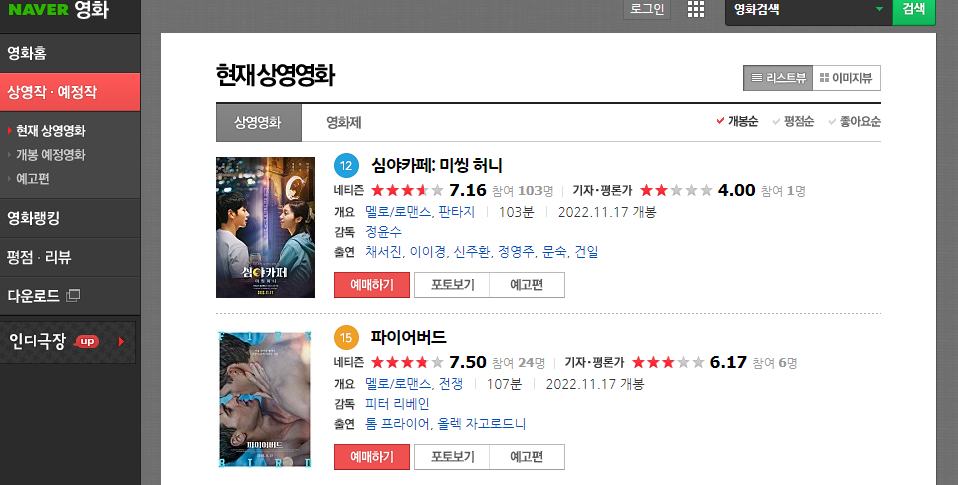

1. 제목 / { 네티즌 평점/참여 인원 } / {기자 평점 / 인원 } / 감독 / 출연진 / 개봉일
1. `함수` 적용해 보세요
1. **완료시** 과제폴더 오늘날자에 `이름_영화상영작.ipynb` 형식으로 업로드.
